# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

Загрузить датасет по url:


In [79]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
#Для понимания посмотрим описательные статистики датасета
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [80]:
#Всего пропущенных значений в датасете
df.isnull().sum().sum()

23

In [81]:
#Заменим все пропущенные числовые значения в датасете на медиану (дальше это пригодится)
def changing_none(column):
    column[column.isnull()] = statistics.median(column.dropna())

In [82]:
for col in df.columns:
    if is_string_dtype(df[col]) == True:
        pass
    else:
        changing_none(df[col])
        
df.isnull().sum().sum() #контрольная проверка пропусков

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

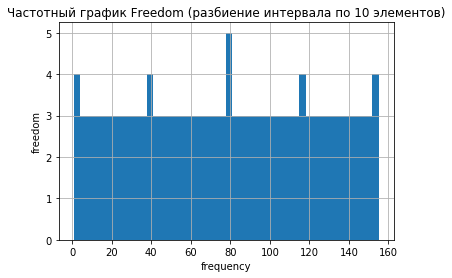

In [12]:
n, bins, patches = plt.hist(df['Freedom'], 50)

plt.xlabel('frequency')
plt.ylabel('freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

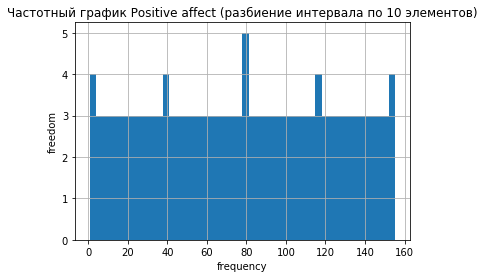

In [13]:
n, bins, patches = plt.hist(df['Positive affect'], 50)

plt.xlabel('frequency')
plt.ylabel('freedom')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

__Вывод:__ мы не использовали статистические критерии проверки распределения, но исходя из гистограмм можно заключить, что переменные Freedom и Positive affect не подчиняются закону нормального распределения. Вероятно, равномерное распределение или стремящиеся к нему.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [14]:
#Медиана
statistics.median(df['Freedom'])

78.0

In [15]:
#Мода
statistics.mode(df['Freedom'])

78.0

In [84]:
#Дисперсия
statistics.pvariance(df['Freedom'])

1989.1666666666667

In [83]:
#Стандартное отклонение
statistics.pstdev(df['Freedom'])

44.60007473835292

In [16]:
#Мат. ожидание (в данном случае среднее арифмитическое)
statistics.mean(df['Freedom'])

78.0

In [18]:
#Минимум
min(df['Freedom'])

1.0

In [19]:
#Максимум
max(df['Freedom'])

155.0

In [20]:
#Размах
max(df['Freedom']) - min(df['Freedom'])

154.0

In [40]:
#Выбросы
#Несколько шагов назад мы заменили все пропущенные значения на медиану. Распространненый вариант нахождения выбросов - 
#это 1.5 интерквартильных расстояний от 25 и 75 процентилей соответственно. Найдём их.
per_twenty_five = np.percentile(df['Freedom'], 25)
per_seventy_five = np.percentile(df['Freedom'], 75)
IQR = per_seventy_five - per_twenty_five

low_out_border =  per_twenty_five - (IQR * 1.5)
up_out_border =   per_twenty_five + (IQR * 1.5) 

print(f"Граница верхних выбросоы: {up_out_border}, граница нижних выбросов: {low_out_border}")

Граница верхних выбросоы: 154.5, граница нижних выбросов: -75.0


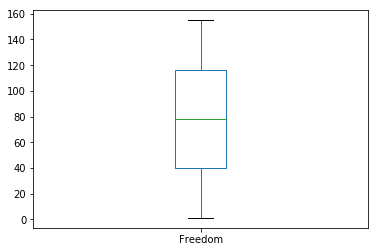

In [32]:
#Лучше всего выбросы видны на боксплоте
df['Freedom'].plot(kind='box')

__Вывод:__ методики определения IQR могут отличаться и соответственно результат "ручного" расчёта и боксплота тоже отличен, заключим по графику, что выбросов нет.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

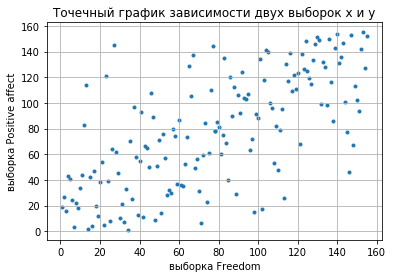

In [41]:
#1. Графически
freedom = df['Freedom']
paffect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, paffect, marker='.')

In [42]:
import scipy.stats as sc
#2. Коэффициент корреляции Пирсона
sc.stats.pearsonr(df['Freedom'], df['Positive affect'])

(0.6817698430601656, 1.1635780330385966e-22)

In [43]:
#Графики, построенные ранее, показали нам ненормальный характер распределения,
#Пирсона при этом использовать нельзя, поэтому добавим коэфициент Спирмена
#Результат близкий
sc.stats.spearmanr(df['Freedom'], df['Positive affect'])

SpearmanrResult(correlation=0.682049725861336, pvalue=1.1009379556727109e-22)

__Вывод:__ сила корреляции крайне мала, на уровне 0.6, но при этом статистически значима согласно полученному p-value.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [44]:
#Классический способ нормализации: разность наблюдения и среднего по выборке
#по отношению к стандартному отклонению
df['norm Freedom'] = (df['Freedom'] - df['Freedom'].mean()) / statistics.pstdev(df['Freedom'])

In [45]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,norm Freedom
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,-1.636769
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,-1.614347
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,-1.681612
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,-1.591926
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,-1.322868


Построить матрицу корреляций для всех колонок таблицы

In [73]:
#1. Приведём все переменные к одному масштабу, методом минмакс
df_cor = df.drop(['Country (region)', 'norm Freedom'], axis = 1)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df_cor)
df_cor_mat = pd.DataFrame(np_scaled)
df_cor_mat.columns = list(df.drop(['Country (region)', 'norm Freedom'], axis = 1).columns)
df_cor_mat.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,0.000000,0.019355,0.259740,0.058442,0.006494,0.025974,0.020408,0.298701,0.139073,0.174497
1,0.006452,0.077419,0.149351,0.162338,0.019481,0.032468,0.013605,0.136364,0.086093,0.147651
2,0.012903,0.045161,0.097403,0.181818,0.012987,0.012987,0.047619,0.064935,0.039735,0.073826
3,0.019355,0.051613,0.012987,0.012987,0.000000,0.038961,0.299320,0.012987,0.092715,0.080537
4,0.025806,0.000000,0.071429,0.155844,0.090909,0.116883,0.074830,0.038961,0.072848,0.114094


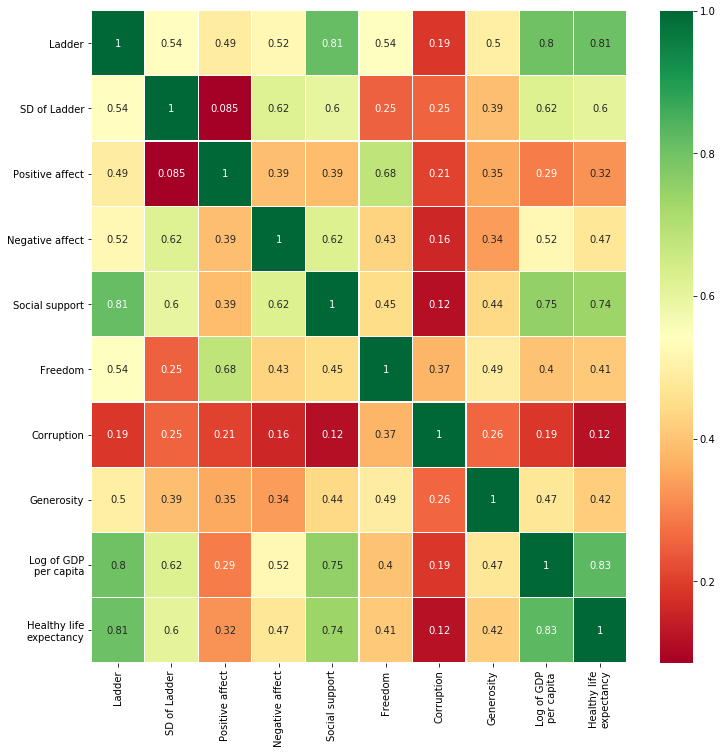

In [75]:
import seaborn as sns
sns.heatmap(df_cor_mat.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

__Вывод:__ corruption имеет наименьшую корреляцию с другими переменными, сильные положительные корреляции Healthy life expectancy vs Ladder, Log of GDP per capita vs Ladder и прочие.

Загрузить следующую таблицу: 

In [85]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

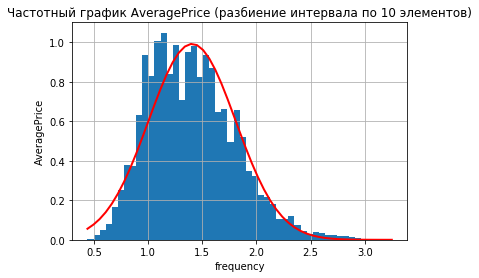

In [87]:
n, bins, patches = plt.hist(df['AveragePrice'], 50, density=True)
mu = df['AveragePrice'].mean()
sigma = statistics.pstdev(df['AveragePrice'])

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

__Вывод:__ визуально распределение похоже на нормальное с правосторонней ассиметрией или на логнормальное.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [88]:
sc.stats.pearsonr(df['AveragePrice'], df['4046'])

(-0.20831704848788477, 4.5949342992885564e-178)

__Вывод:__ корреляция между AveragePrice и 4046 незначительна.